<a href="https://colab.research.google.com/github/TolaniSilas/TolaniSilas/blob/main/gripregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the necessary libraries and modules.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from scipy.stats import loguniform

In [3]:
student_data = pd.read_csv("/content/drive/MyDrive/Datasets/student_scores_data.csv")

# Print out few rows of the student data.
print(student_data.head())

# Check for missing values.
print(student_data.isna().sum())

# Print the info of the dataframe.
print(student_data.info())

# The size of the data.
print(f"\nThe size of the student data is {student_data.size} data points.")

# The shape of the data.
print(f"\nThe data has {student_data.shape[0]} rows and {student_data.shape[1]} columns.")



   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Hours     0
Scores    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

The size of the student data is 50 data points.

The data has 25 rows and 2 columns.


Text(0, 0.5, 'Percentage of Scores')

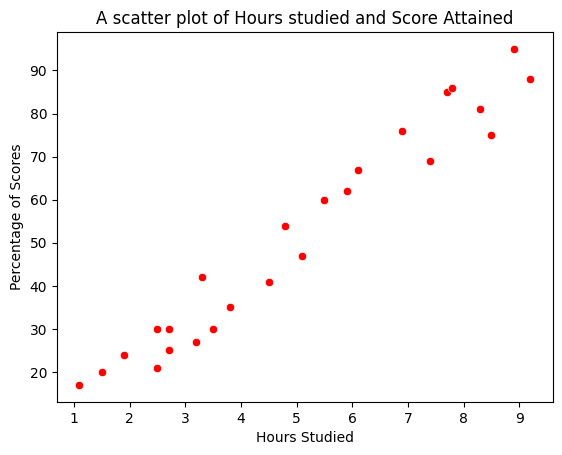

In [4]:
# Plot the distribution of the dataset.
sns.scatterplot(data=student_data, y='Scores', x="Hours", c="r")
plt.title("A scatter plot of Hours studied and Score Attained")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Scores")

<Axes: xlabel='Hours', ylabel='Count'>

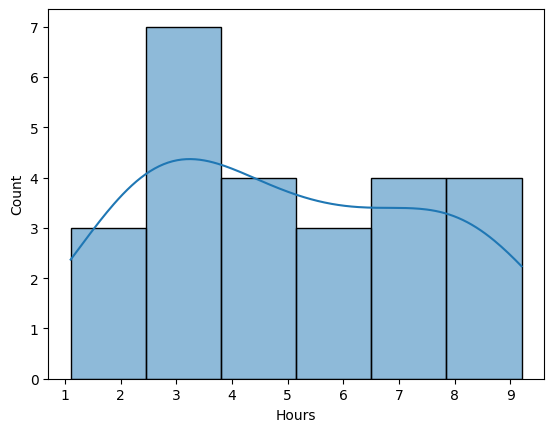

In [5]:
# Check the distribution of the feature variable.
sns.histplot(data=student_data, x="Hours", kde=True)

<Axes: xlabel='Hours'>

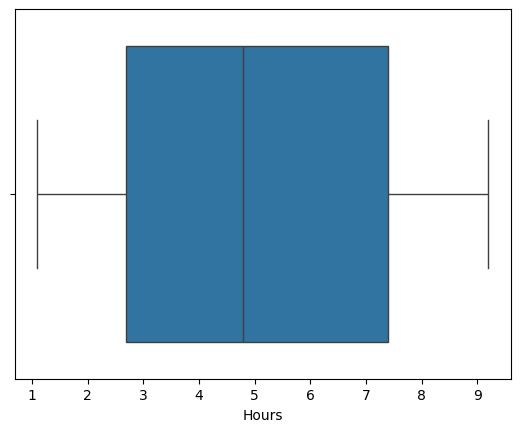

In [6]:
sns.boxplot(data=student_data, x="Hours")

<Axes: xlabel='Scores', ylabel='Count'>

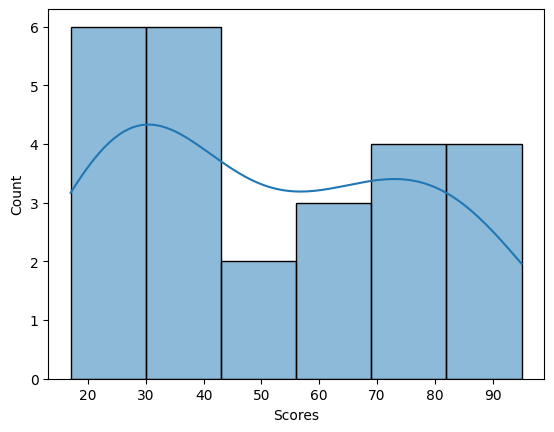

In [7]:
# Checking the distribution of the target(outcome).
sns.histplot(data=student_data, x="Scores", kde=True)

<Axes: xlabel='Scores'>

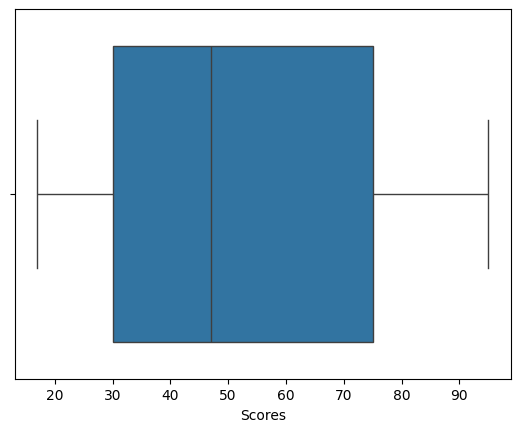

In [8]:
sns.boxplot(data=student_data, x="Scores")

In [28]:
# Split the data into feature variable and target(outcome).
X = student_data[["Hours"]]
y = student_data["Scores"]

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=5, random_state = 2024)

# Scale the train and test feature variable.
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)


In [32]:
# # Instantiate the SGD Regressor class.
# sdg_reg = SGDRegressor(max_iter=1500, verbose=3, random_state=2024)
# sdg_reg.fit(scaled_train, y_train)

param_dist = {
    'alpha': loguniform(1e-5, 1e2),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
}

# Create SGDRegressor
sgd_reg = SGDRegressor(random_state = 2024, verbose=0)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(sgd_reg, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model
random_search.fit(scaled_train, y_train)

# Print the best parameters and best score.
print("Best hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Get the best model.
best_sgd_model = random_search.best_estimator_


# Print the coefficients and intercept
print(f"\nCoefficients: { best_sgd_model.coef_}.")
print(f"Intercept: {best_sgd_model.intercept_}.")

# Evaluate on the train set
train_pred = random_search.predict(scaled_train)

# Evaluate on the test set
y_pred = random_search.predict(scaled_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

mse = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mse)

Best hyperparameters: {'alpha': 0.0142395007822377, 'l1_ratio': 0.3, 'max_iter': 1000, 'penalty': 'l2'}
Best Score: -32.73805575044601

Coefficients: [22.1325608].
Intercept: [48.33515963].
Mean Squared Error on Test Set: 54.08808232816675
Mean Absolute Error on Test Set: 6.989438128175474


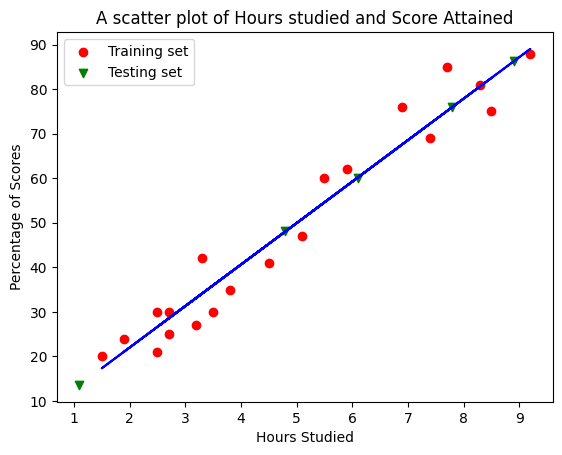

In [33]:
plt.scatter(X_train, y_train, marker='o', c='red', label='Training set')
plt.scatter(X_test, y_pred, marker='v', c='green', label='Testing set')
plt.plot(X_train, train_pred, c='blue')
plt.title("A scatter plot of Hours studied and Score Attained")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Scores")
plt.legend()

In [35]:
# Scale the train and test feature variable.
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X)


# Create empty lists for train and test scores.
train_scores, val_scores = [], []

# Divide the dataset into 5 folds.
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=2024)


for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Scale the features for training and validation sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)


    # Instantiate and train your model (SGDRegressor in this case)

     # Make predictions on the training set.
    train_pred = best_sgd_model.predict(X_train)

    # Evaluate the train accuracy score.
    train_score = best_sgd_model.score(X_train_scaled, y_train)
    train_scores.append(train_score)


    # Make predictions on the validation set.
    val_pred = best_sgd_model.predict(X_val)

    # Evaluate the validation accuracy score.
    val_score = best_sgd_model.score(X_val_scaled, y_val)
    val_scores.append(val_score)


print(f"\n{np.mean(train_scores)}")
print(f"\n{np.mean(val_scores)}")


0.925850508240841

0.9259870503109651


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/di

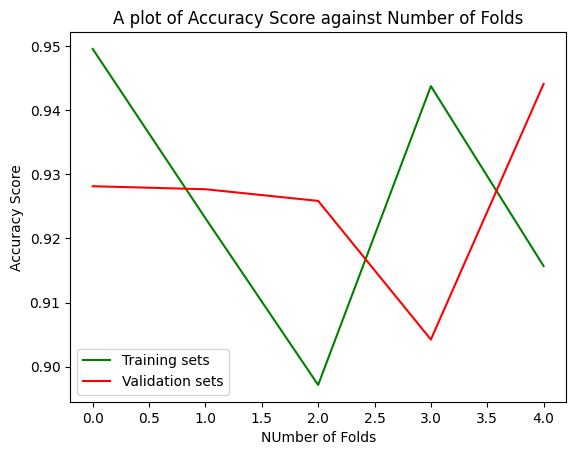

In [51]:
plt.plot(train_scores, c='green', label="Training sets")
plt.plot(val_scores, c='red', label="Validation sets")
plt.xlabel('NUmber of Folds')
plt.ylabel("Accuracy Score")
plt.title("A plot of Accuracy Score against Number of Folds")
plt.legend()

In [49]:
def predict_score(X_input):
    """A function that predicts the percentage of score."""

    # Scale the user input.
    scaled_input = scaler.transform(np.array([X_input]).reshape(-1, 1))

    # Predict the user number of hours study/day.
    preds = best_sgd_model.predict(scaled_input)

    return preds

def user_input():
    """A function that accepts a user input (the number of hours a student studies) and outputs the score percentage."""

    while True:
        user_pred = input("Wanna make predictions based on the number of hours studied per day? (Yes/No): ").title()

        if user_pred == "Yes":
            user = float(input("Enter the number of hours the student studied for: "))
            preds = predict_score(user)

            print(f"The score percentage of the student is {round(preds[0], 0)} percent.\n")

        elif user_pred == "No":
            break  # Exit the loop if the user enters "No".

        else:
            print("Please enter either 'Yes' or 'No'.\n")

# Call the user_input function to start the interaction.
user_input()


print(user_input())





Wanna make predictions based on the number of hours studied per day? (Yes/No): yes
Enter the number of hours the student studied for: 9.25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The score percentage of the student is 85.0 percent.

Wanna make predictions based on the number of hours studied per day? (Yes/No): no
Wanna make predictions based on the number of hours studied per day? (Yes/No): no
None


Norm: 9.66, NNZs: 1, Bias: 1.857673, T: 400, Avg. loss: 14.351521
-- Epoch 10
Norm: 9.66, NNZs: 1, Bias: 1.932805, T: 200, Avg. loss: 14.685131

22.40, NNZs: 1, Bias: 48.243375